# UNIDADE 2: Tratamento dos dados

2.1. Análise exploratória de dados (EDA)</br>
2.2. Limpeza de dados</br>
2.3. Transformação de dados</br>
2.3.1. Divisão dos dados</br>
2.3.2. Balanceamento</br>
2.3.3. Escalonamento</br>
2.3.4. Codificação e criação de features</br>
2.4. Redução de dimensionalidade</br>


# Classificação Binária

A classificação em uma de duas classes é um problema comum em aprendizado de máquina. Você pode querer prever se um cliente provavelmente fará uma compra ou não, se uma transação de cartão de crédito foi fraudulenta ou não. Todos esses são problemas de <span style="color:red">classificação binária por terem apenas duas possibilidades de resposta</span>.

Nos seus dados brutos, as classes podem ser representadas por strings como "Sim" e "Não". <span style="color:red">Antes de usar esses dados, atribuiremos um rótulo de classe: uma classe será 0 e a outra será 1</span>.

<div style="border: 2px solid #00008B; padding: 15px; border-radius: 10px; background-color: #00008B; color: #FFFFFF; font-family: Arial;">
  <h1 style="margin-top: 0;">Planejamento de Sucessão</h1>
  <p>Descrição: Identificar funcionários com potencial para ocupar cargos de liderança no futuro e planejar a sucessão de cargos críticos</p>
  <p>Dados sintéticos produzidos pelo ChatGPT, baseado no projeto Google Oxygen: Como a Google usou dados para ver se os gerentes fazem diferença?</p>

</div>


- https://www.linkedin.com/pulse/project-oxygen-8-conselhos-do-google-para-o-gerente-david/</br>
- https://www.feedz.com.br/blog/projeto-oxigenio-do-google</br>



<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <ul>
    <li>Idade do funcionário (valores inteiros  de 18 a 75)</li>
    <li>Nível de educação (valores Superior, Médio, Doutorado, Especialização)</li>
    <li>Avaliação de desempenho (valores inteiros  entre 0 e 5)</li>
    <li>Experiência em cargos de liderança(valores 0 ou 1)</li>
    <li>Habilidades e competências (valores inteiros entre 0 a 10)</li>
    <li>Participação em treinamentos de liderança (valores S ou N)</li>
    <li>Feedback de supervisores (valores reais enter 0.0 e 1.0)</li>
    <li>Satisfação no trabalho (valores inteiros entre 0 e 5)</li>
    <li>É um bom coach (valores S ou N)</li>
    <li>Empodera a equipe e não faz microgestão (valores S ou N)</li> 
    <li>Exprime interesse e preocupação pelo sucesso e bem-estar pessoal dos membros da equipe (valores S ou N)</li>
    <li>É produtivo e orientado para os resultados (valores S ou N)</li>
    <li>É bom comunicador - escuta e compartilha informações (valores S ou N)</li>
    <li>Ajuda com desenvolvimento de carreira (valores S ou N)</li>
    <li>Tem uma visão clara e estratégia para a equipe (valores S ou N)</li>
    <li>Possui habilidades técnicas fundamentais que o ajudam a aconselhar a equipe (valores S ou N)</li>
    <li><b>Lider (valores S ou N)</b></li>
  </ul>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <h3>Fluxo no Pipeline</h3>
  <ul>
    <li><b>Ingestão de Dados</b>: Coleta e armazenamento de dados brutos.</li>
    <li><b><span style="color:red">Análise Exploratória</b>: Utilização dos dados para EDA.</span></li>
    <li><b>Pré-processamento</b>: Limpeza e transformação dos dados.</li>
    <li><b>Normalização e Engenharia de Features</b>: Criação de datasets normalizados e finalizados para treinamento.</li>
    <li><b>Treinamento de Modelos</b>: Utilização dos dados de treinamento e validação para treinar e validar modelos.</li>
    <li><b>Implantação de Modelos</b>: Armazenamento dos modelos treinados em um Model Registry.</li>
    <li><b>Inferência</b>: Utilização de dados de inferência para obter predições dos modelos em produção.</li>
  </ul>

Considerações de MLOps

  <ul>
    <li><b>Versionamento</b>: Versionar tanto os dados quanto os modelos para garantir a reprodutibilidade.</li>
    <li><b>Monitoramento</b>: Implementar monitoramento contínuo dos modelos em produção para detectar drifts de desempenho.</li>
    <li><b>Automatização</b>: Automatizar o pipeline de dados e modelos utilizando ferramentas de CI/CD.</li>
    <li><b>Segurança</b>: Garantir a segurança e conformidade dos dados, especialmente se envolver dados sensíveis.</li>
  </ul>

</div>



<img src="../imagens/pipeline.png" width="500" height="200" />

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
#!pip install pandas

In [68]:
#!pip install scikit-learn

In [69]:
#!pip install --upgrade numpy

In [70]:
#!pip install tqdm

In [71]:
#!pip install seaborn

In [72]:
#!pip install plotly

In [73]:
#!pip install sweetviz

In [74]:
#!pip install ydata-profiling

In [75]:
#!pip install ipywidgets

In [76]:
#!pip install streamlit_pandas_profiling

In [77]:
#!pip install --upgrade visions

In [13]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.5f}'.format)
np.random.seed(0)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import joblib

from tqdm import tqdm
tqdm.pandas()

import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from ydata_profiling import ProfileReport
import sweetviz as sv

# Ingestão de Dados

In [14]:
df_servidor = pd.read_csv("../data/raw/planejamento_sucessao.csv", sep=";")

In [15]:
df_servidor.head(5)

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
0,56.00000,Especialização,4.00000,0.00000,6.00000,S,0.45086,4.00000,N,N,S,N,N,N,N,S,N
1,69.00000,Superior,4.00000,0.00000,8.00000,N,0.09666,0.00000,N,N,S,N,S,N,N,S,N
2,46.00000,Médio,2.00000,0.00000,2.00000,N,0.33515,4.00000,N,N,S,N,S,N,N,S,N
3,32.00000,Superior,5.00000,0.00000,2.00000,S,0.50688,4.00000,N,N,S,N,S,N,N,S,N
4,60.00000,Médio,4.00000,0.00000,7.00000,N,0.73274,0.00000,N,N,S,N,S,N,N,S,N


# Análise Exploratória dos Dados (EDA)

A Análise Exploratória dos Dados (EDA, do inglês Exploratory Data Analysis) é um processo que visa <b>entender e resumir as principais características de um conjunto de dados</b>. A EDA utiliza uma combinação de <b>estatísticas descritivas, gráficos e outras ferramentas visuais</b> para identificar padrões, detectar anomalias, testar hipóteses e verificar pressupostos. O <b>objetivo principal da EDA é obter insights sobre os dados, guiar a seleção de modelos</b> e informar decisões subsequentes em projetos de análise de dados.

<img src="../imagens/eda.png" width="500" height="200" />

https://www.dataimd.com/scripts/explorando-os-segredos-dos-dados-uma-jornada-de-descobertas-atrav-s-da-an-lise-explorat-ria/

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Poderíamos fazer algumas perguntas: </h3>
    
1. * Qual a **dimensão** da base de dados?
2. * Como está a **distribuição** dos dados?
3. Qual o nível de experiência em cargos de liderança da maioria dos profissionais?
4. * Quais os **valores únicos** de cada variável?
5. * Existem **valores ausentes** nas features?
6. * Os dados estão **balanceamento** nas classes?
7. Quais são os principais níveis educacionais?
8. Existe alguma relação entre o nível de educação e o feedback dos supervisores?
9. Existe relação entre Nivel Educacao,Treinamento Lideranca e Avaliacao Desempenho
10. * Existem campos com **outliers**?
 
    
</div>

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Qual a dimensão da base de dados? </h3> 
    
Saber quantas linhas e colunas estão presentes ajuda a **entender a escala do trabalho**. Isso é essencial para planejar a análise e **definir a abordagem metodológica**.
</div>


In [16]:
# Quantidade de linhas e colunas
df_servidor.shape

(5000, 17)

In [17]:
# Tipo de dados
df_servidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Idade                         4901 non-null   float64
 1   Nivel_educacao                4904 non-null   object 
 2   Avaliacao_desempenho          4900 non-null   float64
 3   Experiencia_cargos_lideranca  4900 non-null   float64
 4   Habilidades_competencias      4900 non-null   float64
 5   Treinamento_lideranca         5000 non-null   object 
 6   Feedback_supervisores         4900 non-null   float64
 7   Satisfacao_trabalho           4900 non-null   float64
 8   Lider                         5000 non-null   object 
 9   Coach                         5000 non-null   object 
 10  Empodera                      5000 non-null   object 
 11  Sucesso_membros               5000 non-null   object 
 12  Orientado_resultados          5000 non-null   object 
 13  Com

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Como está a distribuição dos dados?</h3>
    
A distribuição dos dados revela padrões importantes, como a frequência de valores, a presença de picos, vales, e assimetrias. Permite **identificar medidas** de tendência central (média, mediana, moda) e como os dados estão espalhados em torno dessas medidas. **Anomalias ou valores extremos** podem ser facilmente identificados ao analisar a distribuição, ajudando a entender se esses valores são erros ou observações significativas. Análises de distribuição ajudam a **identificar possíveis problemas com os dados**, como valores faltantes ou registros incorretos.
</div>

In [18]:
# Estatísticas descritivas básicas para dados numéricos
df_servidor['Idade'].describe()

count   4901.00000
mean      46.72108
std       16.68998
min        5.00000
25%       32.00000
50%       47.00000
75%       61.00000
max      120.00000
Name: Idade, dtype: float64

In [19]:
# Estatísticas descritivas básicas para dados numéricos: todas as colunas
df_servidor.describe()

,Idade,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Feedback_supervisores,Satisfacao_trabalho
count,4901.00000,4900.00000,4900.00000,4900.00000,4900.00000,4900.00000
mean,46.72108,2.45245,0.28082,4.94857,0.49767,2.51286
std,16.68998,1.71100,0.44944,3.38256,0.28899,1.69544
min,5.00000,0.00000,0.00000,0.00000,0.00029,0.00000
25%,32.00000,1.00000,0.00000,2.00000,0.24690,1.00000
50%,47.00000,2.00000,0.00000,5.00000,0.49318,2.00000
75%,61.00000,4.00000,1.00000,8.00000,0.74933,4.00000
max,120.00000,5.00000,1.00000,90.00000,0.99969,5.00000


In [20]:
# Estatísticas descritivas básicas para dados categóricos
df_servidor.describe(include=['O'])

,Nivel_educacao,Treinamento_lideranca,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
count,4904,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5,4,2,2,2,2,2,2,2,2,2
top,Especialização,N,N,N,N,N,N,N,N,N,N
freq,2206,2432,4536,4092,4249,4153,4250,3860,3850,4461,3187


In [21]:
# Estatísticas descritivas básicas para todos os tipos de dados
df_servidor.describe(include='all')

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
count,4901.00000,4904,4900.00000,4900.00000,4900.00000,5000,4900.00000,4900.00000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,NaN,5,NaN,NaN,NaN,4,NaN,NaN,2,2,2,2,2,2,2,2,2
top,NaN,Especialização,NaN,NaN,NaN,N,NaN,NaN,N,N,N,N,N,N,N,N,N
freq,NaN,2206,NaN,NaN,NaN,2432,NaN,NaN,4536,4092,4249,4153,4250,3860,3850,4461,3187
mean,46.72108,NaN,2.45245,0.28082,4.94857,NaN,0.49767,2.51286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16.68998,NaN,1.71100,0.44944,3.38256,NaN,0.28899,1.69544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.00000,NaN,0.00000,0.00000,0.00000,NaN,0.00029,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,1.00000,0.00000,2.00000,NaN,0.24690,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.00000,NaN,2.00000,0.00000,5.00000,NaN,0.49318,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,61.00000,NaN,4.00000,1.00000,8.00000,NaN,0.74933,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Transpõe o DataFrame resultante: troca linhas por colunas
df_servidor.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,4901.00000,46.72108,16.68998,5.00000,32.00000,47.00000,61.00000,120.00000
Avaliacao_desempenho,4900.00000,2.45245,1.71100,0.00000,1.00000,2.00000,4.00000,5.00000
Experiencia_cargos_lideranca,4900.00000,0.28082,0.44944,0.00000,0.00000,0.00000,1.00000,1.00000
Habilidades_competencias,4900.00000,4.94857,3.38256,0.00000,2.00000,5.00000,8.00000,90.00000
Feedback_supervisores,4900.00000,0.49767,0.28899,0.00029,0.24690,0.49318,0.74933,0.99969
Satisfacao_trabalho,4900.00000,2.51286,1.69544,0.00000,1.00000,2.00000,4.00000,5.00000


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Qual o nível de experiência em cargos de liderança da maioria dos profissionais?</h3>
    
**Contar o número total de observações** (linhas) e variáveis (colunas) fornece uma visão geral da dimensão do conjunto de dados. Contar as frequências de categorias em variáveis categóricas ajuda a **entender a distribuição e a prevalência de diferentes categorias**.

</div>

*  **value_counts()**: contar a frequência de valores únicos em uma série ou coluna de um DataFrame

In [23]:
counts = df_servidor['Experiencia_cargos_lideranca'].value_counts()
counts

Experiencia_cargos_lideranca
0.00000    3524
1.00000    1376
Name: count, dtype: int64

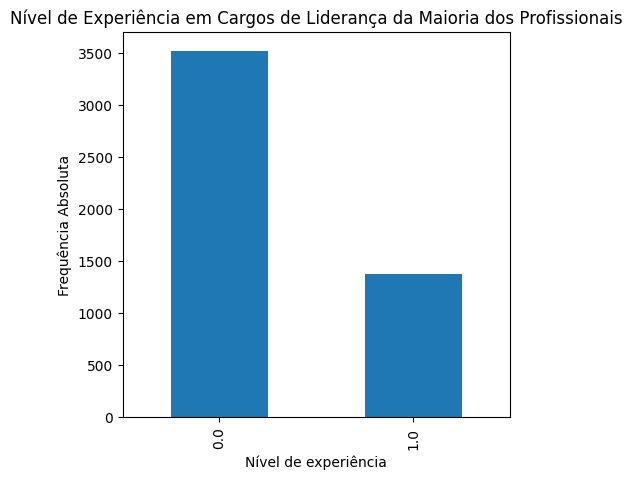

In [24]:
plt.figure(figsize=(5, 5))
ax = counts.plot(kind='bar')
plt.xlabel('Nível de experiência')
plt.ylabel('Frequência Absoluta')
plt.title('Nível de Experiência em Cargos de Liderança da Maioria dos Profissionais')
plt.show()

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Quais os valores únicos de cada variável?</h3>
    
    
Verificar os valores únicos das variáveis categóricas ajuda a <b>entender melhor os dados</b>. Isso permite identificar todas as categorias presentes em uma variável e verificar se elas fazem sentido no contexto do problema. 
    
Ao verificar os valores únicos, é possível <b>identificar erros e inconsistências nos dados</b>. Por exemplo, uma variável categórica que deveria ter apenas valores como 'Sim' e 'Não' pode conter erros tipográficos como 'sim', 'SIM', 'nao', 'Nao', etc. Corrigir esses erros é crucial para garantir a qualidade dos dados.
</div>

*  **unique()**: retornar os valores únicos presentes em uma série ou coluna de um DataFrame

In [25]:
df_servidor["Nivel_educacao"].unique()

array(['Especialização', 'Superior', 'Médio', 'Doutorado',
       'Não Especifica', nan], dtype=object)

In [26]:
df_servidor["Treinamento_lideranca"].unique()

array(['S', 'N', 'D', 'n'], dtype=object)

In [27]:
df_servidor["Lider"].unique()

array(['N', 'S'], dtype=object)

In [28]:
df_servidor["Coach"].unique()

array(['N', 'S'], dtype=object)

In [29]:
df_servidor["Empodera"].unique()

array(['S', 'N'], dtype=object)

In [30]:
df_servidor["Sucesso_membros"].unique()

array(['N', 'S'], dtype=object)

In [31]:
df_servidor["Orientado_resultados"].unique()

array(['N', 'S'], dtype=object)

In [32]:
df_servidor["Comunicador"].unique()

array(['N', 'S'], dtype=object)

In [33]:
df_servidor["Desenvolvimento_carreira"].unique()

array(['N', 'S'], dtype=object)

In [34]:
df_servidor["Estrategia_equipe"].unique()

array(['S', 'N'], dtype=object)

In [35]:
df_servidor["Habilidades_tecnicas"].unique()

array(['N', 'S'], dtype=object)

*  **select_dtypes()**: Éselecionar colunas de um DataFrame com base em seus tipos de dados

In [36]:
df_servidor.select_dtypes(include=['object'])

,Nivel_educacao,Treinamento_lideranca,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
0,Especialização,S,N,N,S,N,N,N,N,S,N
1,Superior,N,N,N,S,N,S,N,N,S,N
2,Médio,N,N,N,S,N,S,N,N,S,N
3,Superior,S,N,N,S,N,S,N,N,S,N
4,Médio,N,N,N,S,N,S,N,N,S,N
...,...,...,...,...,...,...,...,...,...,...,...
4995,Especialização,S,N,N,S,N,N,N,S,N,N
4996,Especialização,S,N,N,S,N,N,N,N,N,N
4997,Médio,N,N,N,S,N,N,N,N,N,N
4998,Superior,S,N,N,S,N,N,N,N,N,N


*  **columns**:  obter os nomes das colunas do Dataframe

In [37]:
df_servidor.select_dtypes(include=['object']).columns

Index(['Nivel_educacao', 'Treinamento_lideranca', 'Lider', 'Coach', 'Empodera',
       'Sucesso_membros', 'Orientado_resultados', 'Comunicador',
       'Desenvolvimento_carreira', 'Estrategia_equipe',
       'Habilidades_tecnicas'],
      dtype='object')

In [38]:
# Mostrando as contagens de cada categoria
[print(f'\n{df_servidor[col].value_counts()}\n') for col in df_servidor.select_dtypes(include=['object']).columns]


Nivel_educacao
Especialização    2206
Médio             1262
Doutorado          816
Superior           520
Não Especifica     100
Name: count, dtype: int64


Treinamento_lideranca
N    2432
S    2369
D     100
n      99
Name: count, dtype: int64


Lider
N    4536
S     464
Name: count, dtype: int64


Coach
N    4092
S     908
Name: count, dtype: int64


Empodera
N    4249
S     751
Name: count, dtype: int64


Sucesso_membros
N    4153
S     847
Name: count, dtype: int64


Orientado_resultados
N    4250
S     750
Name: count, dtype: int64


Comunicador
N    3860
S    1140
Name: count, dtype: int64


Desenvolvimento_carreira
N    3850
S    1150
Name: count, dtype: int64


Estrategia_equipe
N    4461
S     539
Name: count, dtype: int64


Habilidades_tecnicas
N    3187
S    1813
Name: count, dtype: int64



[None, None, None, None, None, None, None, None, None, None, None]

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Existem valores ausentes nas features?</h3>
<p>Valores ausentes podem <b>levar a análises incorretas ou incompletas</b>. Identificar e tratar esses valores garante que os dados utilizados para treinamento e teste sejam consistentes e completos.</p>

<p><b>Muitos algoritmos de aprendizado de máquina não conseguem lidar diretamente com valores ausentes</b>, resultando em erros ou desempenho subótimo. Por exemplo, algoritmos como regressão linear ou SVM requerem que todas as entradas sejam completas. </p>

<p>Uma outra coisa, valores ausentes <b>podem introduzir bias nos resultados do modelo</b>b> se não forem tratados adequadamente. Por exemplo, se os valores ausentes não são aleatórios e estão concentrados em uma classe ou grupo específico, isso pode distorcer os resultados e a precisão do modelo.</p>
</div>

*  **isna()**: retorna um DataFrame ou Série, onde cada elemento é um valor booleano indicando se o elemento correspondente é um valor ausente (NaN) ou não.

* **sum()**: aplicado a um DataFrame ou Série de valores booleanos, o método sum() conta o número de valores True 

In [39]:
df_servidor.isna().sum()

Idade                            99
Nivel_educacao                   96
Avaliacao_desempenho            100
Experiencia_cargos_lideranca    100
Habilidades_competencias        100
Treinamento_lideranca             0
Feedback_supervisores           100
Satisfacao_trabalho             100
Lider                             0
Coach                             0
Empodera                          0
Sucesso_membros                   0
Orientado_resultados              0
Comunicador                       0
Desenvolvimento_carreira          0
Estrategia_equipe                 0
Habilidades_tecnicas              0
dtype: int64

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Os dados estão balanceamento nas classes?</h3>
    
A plotagem de contagem dos alvos indica um <b>desequilíbrio nos dados</b>. Este é um caso que tende a fornecer uma <b>precisão de classificação enganosa</b>. Se uma categoria é muito mais frequente do que outras, pode ser necessário aplicar técnicas de balanceamento, como oversampling, undersampling ou a geração de novos exemplos sintéticos para equilibrar a distribuição das classes.
</div>

In [40]:
count = df_servidor["Nivel_educacao"].value_counts()

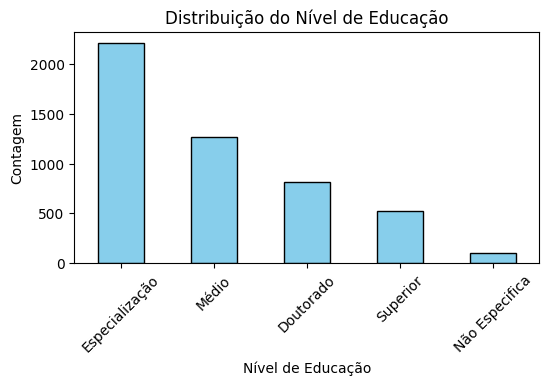

In [41]:
# Usano o matplotlib: https://matplotlib.org/

plt.figure(figsize=(6, 3))
ax = count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45) 
plt.show()

In [42]:
count = df_servidor["Treinamento_lideranca"].value_counts()
count

Treinamento_lideranca
N    2432
S    2369
D     100
n      99
Name: count, dtype: int64

*  **reset_index()**: reseta o índice da Série resultante de value_counts(), transformando-a em um DataFrame

In [43]:
count = df_servidor["Treinamento_lideranca"].value_counts().reset_index()
count

,Treinamento_lideranca,count
0,N,2432
1,S,2369
2,D,100
3,n,99


In [44]:
count.columns = ['Treinamento_lideranca', 'Contagem']
count.columns

Index(['Treinamento_lideranca', 'Contagem'], dtype='object')

In [45]:
count

,Treinamento_lideranca,Contagem
0,N,2432
1,S,2369
2,D,100
3,n,99


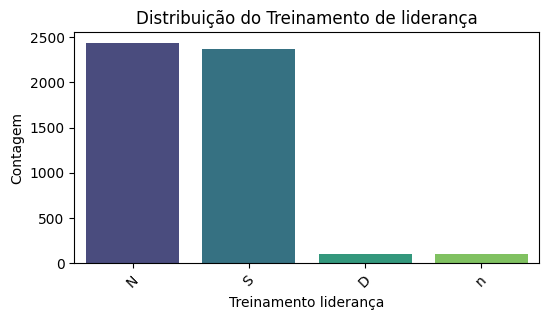

In [46]:
# Usando o Seaborn:  https://seaborn.pydata.org/

plt.figure(figsize=(6, 3))
sns.barplot(data=count, x='Treinamento_lideranca', y='Contagem', palette='viridis')
plt.title('Distribuição do Treinamento de liderança')
plt.xlabel('Treinamento liderança')
plt.ylabel('Contagem')
plt.xticks(rotation=45) 
plt.show()

In [79]:
count = df_servidor["Lider"].value_counts().reset_index()
count.columns = ['Lider', 'Contagem']


# Usando o Plotly:  https://plotly.com/
fig = px.bar(count, x='Lider', y='Contagem', 
             title='Distribuição da Liderança', 
             labels={'Lider':'Lider', 'Contagem':'Contagem'}, 
             color='Contagem', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Distribuição da Liderança', yaxis_title='Contagem', xaxis_tickangle=-45)
fig.show()

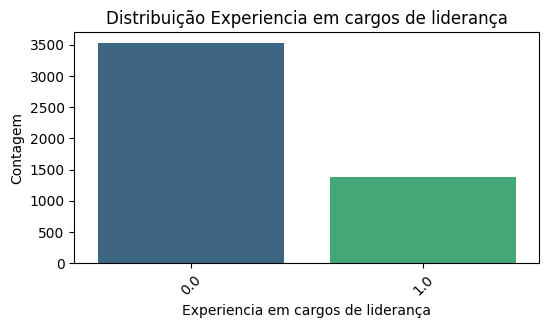

In [48]:
count = df_servidor["Experiencia_cargos_lideranca"].value_counts().reset_index()
count.columns = ['Experiencia_cargos_lideranca', 'Contagem']

plt.figure(figsize=(6, 3))
sns.barplot(data=count, x='Experiencia_cargos_lideranca', y='Contagem', palette='viridis')
plt.title('Distribuição Experiencia em cargos de liderança')
plt.xlabel('Experiencia em cargos de liderança')
plt.ylabel('Contagem')
plt.xticks(rotation=45) 
plt.show()

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Existe alguma relação entre o nível de educação e o feedback dos supervisores?</h3>
    
**Agrupar os dados** permite **identificar padrões e tendências que podem ser específicos a determinados grupos** ou categorias, proporcionando insights mais detalhados e relevantes. Permite identificar outliers que são específicos a certos grupos, que podem ser perdidos em uma análise global. Permite **criar modelos preditivos mais precisos e específicos para diferentes grupos**, melhorando a acurácia e a relevância das previsões.
</div>

*  **copy()** é utilizado para criar uma cópia completa (deep copy) do DataFrame
*  **cut()**  do pandas é usada para segmentar e classificar dados em bins (intervalos)

In [49]:
df_servidor_temp = df_servidor.copy()
df_servidor_temp['Feedback_supervisores_range'] = pd.cut(df_servidor_temp['Feedback_supervisores'], 
                                                    bins=3, 
                                                    labels=['baixo', 'médio', 'alto'])

df_servidor_temp[['Feedback_supervisores','Feedback_supervisores_range']]

,Feedback_supervisores,Feedback_supervisores_range
0,0.45086,médio
1,0.09666,baixo
2,0.33515,médio
3,0.50688,médio
4,0.73274,alto
...,...,...
4995,0.71530,alto
4996,0.48405,médio
4997,0.63743,médio
4998,0.61584,médio


*  **groupby**:  usada para dividir um DataFrame em grupos baseados em valores de uma ou mais colunas, aplicar uma função a cada grupo de forma independente e combinar os resultados em um DataFrame, Série ou outra estrutura de dados pandas. Esse processo é frequentemente descrito pelo paradigma "split-apply-combine".

Funções comuns incluem sum(), mean(), count(), min(), max(), agg(), entre outras.


In [50]:
grouped_data = df_servidor_temp.groupby(['Nivel_educacao', 'Feedback_supervisores_range']).size().reset_index(name='Qtd')
grouped_data

,Nivel_educacao,Feedback_supervisores_range,Qtd
0,Doutorado,baixo,270
1,Doutorado,médio,257
2,Doutorado,alto,270
3,Especialização,baixo,720
4,Especialização,médio,733
5,Especialização,alto,715
6,Médio,baixo,437
7,Médio,médio,393
8,Médio,alto,405
9,Não Especifica,baixo,31


*  **grouped_data.groupby('Nivel_educacao')**: Agrupa grouped_data pela coluna Nivel_educacao e calcula a soma de Qtd dentro de cada grupo.

*  **transform('sum')**: Aplica a soma a cada grupo e retorna uma Série de mesmo comprimento que grouped_data, onde cada valor é a soma total de Qtd dentro do respectivo grupo Nivel_educacao.

In [51]:
total_counts  = grouped_data.groupby('Nivel_educacao')['Qtd'].transform('sum')
total_counts

0      797
1      797
2      797
3     2168
4     2168
5     2168
6     1235
7     1235
8     1235
9       98
10      98
11      98
12     509
13     509
14     509
Name: Qtd, dtype: int64

In [52]:
grouped_data['Porcentagem'] = round(grouped_data['Qtd'] /total_counts, 3)
grouped_data

,Nivel_educacao,Feedback_supervisores_range,Qtd,Porcentagem
0,Doutorado,baixo,270,0.33900
1,Doutorado,médio,257,0.32200
2,Doutorado,alto,270,0.33900
3,Especialização,baixo,720,0.33200
4,Especialização,médio,733,0.33800
5,Especialização,alto,715,0.33000
6,Médio,baixo,437,0.35400
7,Médio,médio,393,0.31800
8,Médio,alto,405,0.32800
9,Não Especifica,baixo,31,0.31600


In [53]:
fig = px.bar(grouped_data, 
             x='Nivel_educacao', 
             y='Porcentagem', 
             color='Feedback_supervisores_range', 
             barmode='stack',
             title='Relação entre o Nível Educacional e o Feedback dos Supervisores',
             labels={'Nivel_educacao': 'Nível Educacional', 'Porcentagem': 'Porcentagem', 'Feedback_supervisores_range': 'Feedback Supervisores'})

# Mostrar o gráfico
fig.show()


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Existe relação entre Nivel Educacao,Treinamento Lideranca e Avaliacao Desempenho?</h3>
</div>

In [54]:
grouped = df_servidor.groupby(['Nivel_educacao','Treinamento_lideranca'])['Avaliacao_desempenho'].mean()
grouped

Nivel_educacao  Treinamento_lideranca
Doutorado       D                       2.33333
                N                       2.44444
                S                       2.44186
                n                       3.00000
Especialização  D                       2.23077
                N                       2.36791
                S                       2.52802
                n                       2.29545
Médio           D                       2.40000
                N                       2.42508
                S                       2.52273
                n                       2.40741
Não Especifica  N                       2.63636
                S                       2.29268
                n                       3.00000
Superior        D                       2.07143
                N                       2.34375
                S                       2.57384
                n                       2.60000
Name: Avaliacao_desempenho, dtype: float64

In [55]:
grouped = df_servidor.groupby(['Nivel_educacao','Treinamento_lideranca'])['Avaliacao_desempenho'].mean().unstack()
grouped

Treinamento_lideranca,D,N,S,n
Nivel_educacao,,,,
Doutorado,2.33333,2.44444,2.44186,3.00000
Especialização,2.23077,2.36791,2.52802,2.29545
Médio,2.40000,2.42508,2.52273,2.40741
Não Especifica,NaN,2.63636,2.29268,3.00000
Superior,2.07143,2.34375,2.57384,2.60000


In [56]:
df_servidor.groupby('Experiencia_cargos_lideranca').size().sort_values(ascending = True).plot(kind = 'bar')

<Axes: xlabel='Experiencia_cargos_lideranca'>

In [57]:
df_servidor.groupby('Idade').size().sort_values(ascending = True).plot(kind = 'bar')

<Axes: xlabel='Idade'>

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
<h3>Existem campos com outliers?</h3>
    
Outliers são pontos de dados que <b>se desviam significativamente da maioria dos outros dados em um conjunto</b>. Eles podem surgir devido a variações normais nos dados, erros de medição, erros de entrada de dados, ou eventos raros. Identificar e tratar outliers é uma parte importante do pré-processamento de dados, pois eles <b>podem influenciar negativamente os resultados de análises estatísticas e modelos</b> de aprendizado de máquina.
</div>

<div style="background-color: #f0f8cc; padding: 20px; border-radius: 10px;">
Quartis são valores que dividem um conjunto de dados em quatro partes iguais. Eles são usados para entender a distribuição dos dados, identificando onde se situam os 25%, 50% e 75% dos valores. Aqui estão os quartis principais:
</br></br>
<b>Q1 (Primeiro Quartil)</b>: Marca o ponto abaixo do qual 25% dos dados se encontram. </br>
<b>Q2 (Mediana ou Segundo Quartil)</b>: Divide os dados ao meio, onde 50% dos valores estão abaixo e 50% acima.</br>
<b>Q3 (Terceiro Quartil)</b>: Indica o ponto abaixo do qual 75% dos dados estão. </br>
</div>

https://fernandafperes.com.br/blog/interpretacao-boxplot/


*  **dropna()** remover entradas com valores ausentes (NaN)

In [58]:
df_servidor_temp = df_servidor.copy()
df_servidor_temp = df_servidor_temp.dropna(subset=['Idade'])

# Calcular Q1, Q3, Mediana e IQR
Q1 = df_servidor_temp['Idade'].quantile(0.25)
Q3 = df_servidor_temp['Idade'].quantile(0.75)
median = df_servidor_temp['Idade'].median()
IQR = Q3 - Q1

# Definir os limites inferior e superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

fig = go.Figure()

fig.add_trace(go.Box(
    y=df_servidor_temp['Idade'],
    boxpoints='all', 
    jitter=0.3,     
    pointpos=-1.8,  
    name='Idade',
    marker=dict(color='lightseagreen'),
    line=dict(color='darkblue')
))

# Adicionar linhas verticais para Q1, Q3, Mediana e Limites
# Mediana
fig.add_trace(go.Scatter(
    x=[-0.2, 0.2], 
    y=[median, median], 
    mode='lines', 
    line=dict(color='blue', dash='solid'), 
    name='Mediana (Q2)'
))

# Q1
fig.add_trace(go.Scatter(
    x=[-0.2, 0.2], 
    y=[Q1, Q1], 
    mode='lines', 
    line=dict(color='red', dash='dash'), 
    name='Q1 (1º Quartil)'
))

# Q3
fig.add_trace(go.Scatter(
    x=[-0.2, 0.2], 
    y=[Q3, Q3], 
    mode='lines', 
    line=dict(color='green', dash='dash'), 
    name='Q3 (3º Quartil)'
))

# Limite Inferior
fig.add_trace(go.Scatter(
    x=[-0.2, 0.2], 
    y=[limite_inferior, limite_inferior], 
    mode='lines', 
    line=dict(color='cyan', dash='dot'), 
    name='Limite Inferior'
))

# Limite Superior
fig.add_trace(go.Scatter(
    x=[-0.2, 0.2], 
    y=[limite_superior, limite_superior], 
    mode='lines', 
    line=dict(color='magenta', dash='dot'), 
    name='Limite Superior'
))

fig.update_layout(
    title='Box Plot da Idade com Quartis e Limites para Outliers',
    yaxis_title='Idade',
    xaxis=dict(
        showticklabels=False  
    ),
    showlegend=True,
    height=800  
)
fig.show()


In [59]:
outliers = df_servidor_temp[(df_servidor_temp['Idade'] < limite_inferior) | (df_servidor_temp['Idade'] > limite_superior)]
outliers

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
4619,120.00000,Médio,3.00000,1.00000,4.00000,N,0.25919,0.00000,N,S,N,S,N,N,S,N,S


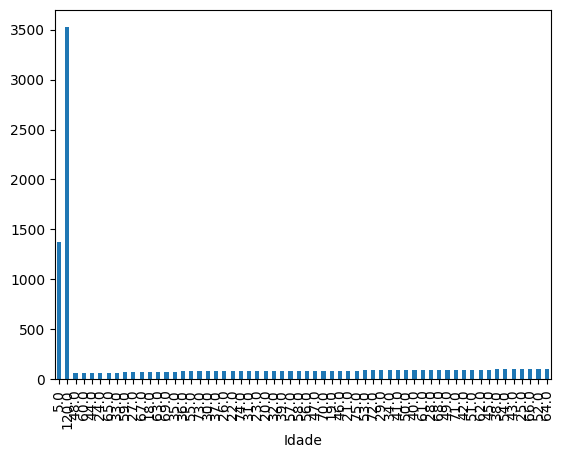

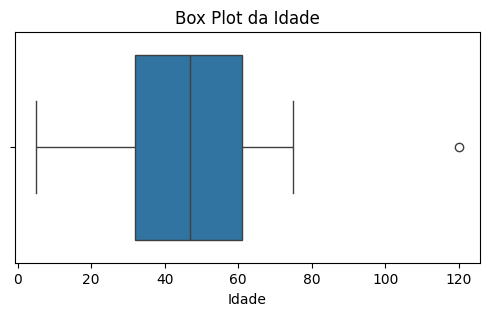

In [60]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_servidor_temp['Idade'])
plt.title('Box Plot da Idade')
plt.xlabel('Idade')
plt.show()

In [61]:
df_servidor_temp = df_servidor_temp.dropna(subset=['Habilidades_competencias'])

Q1 = df_servidor_temp['Habilidades_competencias'].quantile(0.25)
Q3 = df_servidor_temp['Habilidades_competencias'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_servidor_temp[(df_servidor_temp['Habilidades_competencias'] < limite_inferior) | (df_servidor_temp['Habilidades_competencias'] > limite_superior)]
outliers

,Idade,Nivel_educacao,Avaliacao_desempenho,Experiencia_cargos_lideranca,Habilidades_competencias,Treinamento_lideranca,Feedback_supervisores,Satisfacao_trabalho,Lider,Coach,Empodera,Sucesso_membros,Orientado_resultados,Comunicador,Desenvolvimento_carreira,Estrategia_equipe,Habilidades_tecnicas
4989,69.00000,Especialização,2.00000,0.00000,90.00000,N,0.79594,0.00000,N,N,S,N,S,N,S,N,N


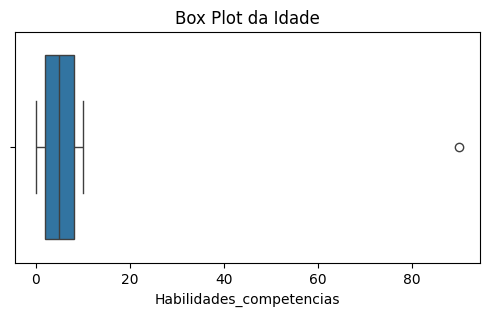

In [62]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_servidor_temp['Habilidades_competencias'])
plt.title('Box Plot da Idade')
plt.xlabel('Habilidades_competencias')
plt.show()

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Quais são os principais níveis educacionais?</h3>
    
**Diferentes visualizações** podem revelar **diferentes padrões nos dados** que não são imediatamente óbvios a partir de simples estatísticas descritivas.
</div>

In [63]:
count = df_servidor['Nivel_educacao'].value_counts().reset_index()
count.columns = ['Nivel_educacao', 'N']
count['Porcentagem'] = round(count['N'] / count['N'].sum(), 3)
count = count.sort_values(by='Porcentagem', ascending=False)

fig = px.treemap(count, 
                 path=['Nivel_educacao'], 
                 values='N', 
                 color='Porcentagem',
                 color_continuous_scale='Blues',
                 title='Distribuição dos Principais Níveis Educacionais',
                 labels={'Nivel_educacao': 'Nível Educação', 'N': 'Número de Observações'})
#fig.dat+a[0].textinfo = 'label+text+value'
fig.show()

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
<h3>Ferramenta de análise de dados</h3>
    
Algumas bibliotecas permitem a criação de relatórios exploratórios completos para um DataFrame do pandas. O relatório inclui informações sobre distribuição de variáveis, estatísticas descritivas, correlações, valores ausentes, entre outros.
Sweetviz  e ProfileReport são bibliotecas de EDA que gera relatórios detalhados e interativos de forma rápida.
</div>

# Relatório pandas-profiling

In [64]:
profile = ProfileReport(df_servidor, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Relatório sweetviz

In [65]:
report = sv.analyze(df_servidor)
report.show_html('relatorio_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report relatorio_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Relatório no streamlit

In [66]:
!streamlit run ../app_eda.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.0.108:8501

Render HTML: 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]
^C
  Stopping...
